In [ ]:
# dados do teste 1 ----- cinco voltas na INOVA (CPH)
# teste 5 voltas: raio 15 metros
# 6 voltas em 187 segundos
# voltas: 28.7, 28.2, 25.71, 25, 24, 24

# dados do teste 2 ----- duas voltas na Reitoria
# teste 2 voltas: raio 7.5 metros
# 2 voltas iguais em 25 segundos

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 18}) # Set global font size to 18

GYRO_SCALE_FACTOR = 70 / 1000

dataset_path = "./data/validacao_imu_volta/Segundo teste - Teste cinco voltas"

acelerometro = pd.read_csv(f'{dataset_path}/103_Acelerometro.csv')
giroscopio = pd.read_csv(f'{dataset_path}/104_Giroscopio.csv')

acelerometro['t'] = acelerometro['date'] - acelerometro['date'][0]

giroscopio['t'] = giroscopio['date'] - giroscopio['date'][0]
giroscopio['GiroZ'] = giroscopio['GiroZ'] * GYRO_SCALE_FACTOR
giroscopio

,index,date,GiroX,GiroY,GiroZ,1,2,3,4,5,t
0,0,1762630630270,17,-15,26.32,1,4352,0,0,0,0
1,1,1762630630286,72,-147,-9.03,255,18432,0,0,0,16
2,2,1762630630303,-5,9,-0.28,255,-1280,0,0,0,33
3,3,1762630630319,3,7,-0.21,255,768,0,0,0,49
4,4,1762630630355,-4,6,-0.21,255,-1024,0,0,0,85
...,...,...,...,...,...,...,...,...,...,...,...
9595,9595,1762630821525,2,-2,0.00,0,512,0,0,0,191255
9596,9596,1762630821542,9,2,0.14,0,2304,0,0,0,191272
9597,9597,1762630821559,5,-2,0.07,0,1280,0,0,0,191289
9598,9598,1762630821576,3,-1,0.00,0,768,0,0,0,191306


14.109555895865238
1.4372546580358236


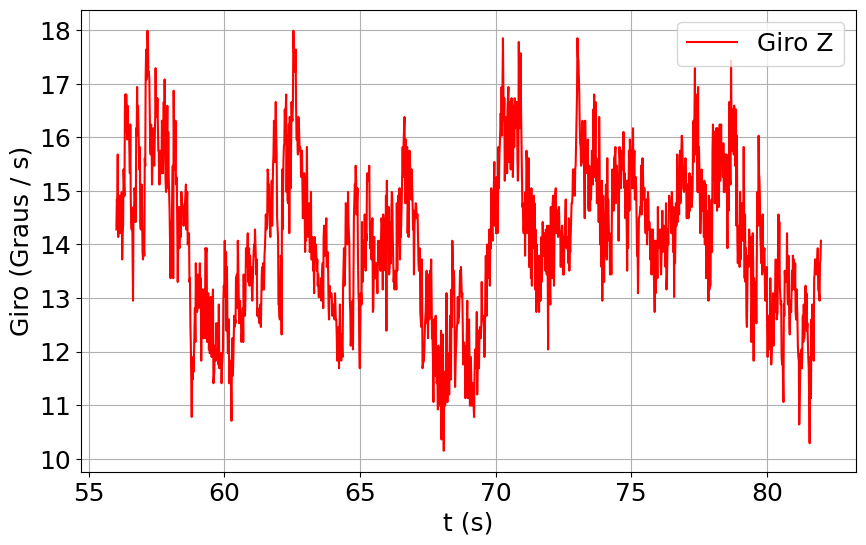

In [40]:
# Create the plot
filtered_df = giroscopio[(giroscopio['t'] >= 56000) & (giroscopio['t'] <= 82000)]
# filtered_df = giroscopio[(giroscopio['t'] >= 56000) & S(giroscopio['t'] <= 187000)]
# filtered_df = giroscopio[(giroscopio['t'] >= 0) & (giroscopio['t'] <= 300000)]
plt.figure(figsize=(10,6))
plt.plot(filtered_df['t'] / 1000, filtered_df['GiroZ'], label="Giro Z", color="red")

print(filtered_df['GiroZ'].mean())
print(filtered_df['GiroZ'].std())

# Add labels and a title
plt.xlabel("t (s)")
plt.ylabel("Giro (Graus / s)")

# Display the plot
plt.grid()
plt.legend()
plt.show()